In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [4]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(df)

scaled_data = scaler.transform(df)

# Initiate the PCA object
# find the principal components using the fit method
# Apply rotation and dimensionality reduction by calling transform()
# We can also specify how many components we want to keep when creating the PCA object

pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

# Can also be done like this:
# data=pca.fit_transform(scaled_data)

print("Shape of before tranform: {}".format(scaled_data.shape))
print("Shape after transform: {}".format(x_pca.shape)) # Independent feature


Shape of before tranform: (569, 30)
Shape after transform: (569, 2)


In [6]:
data=pca.fit_transform(scaled_data)
print(data)

data.tolist()



[[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 ...
 [ 1.25617928 -1.90229671]
 [10.37479406  1.67201011]
 [-5.4752433  -0.67063679]]


[[9.19283682621325, 1.9485830707786087],
 [2.387801795802214, -3.7681717420675698],
 [5.733896279731706, -1.0751737966209178],
 [7.1229531977088865, 10.275589121812805],
 [3.9353020736780984, -1.9480715678001759],
 [2.3802471503459364, 3.949928895550164],
 [2.2388833080524035, -2.6900312772980652],
 [2.1432985003775467, 2.3402440069495434],
 [3.1749242930837354, 3.3918129518468434],
 [6.351746789526099, 7.727174066864843],
 [-0.8104137708452965, -2.65927549768696],
 [2.6511004772424, 0.06656792656644686],
 [8.185034458147957, 2.7009764926129662],
 [0.3421259139901535, -0.968279260857935],
 [4.342379194647861, 4.861083312492756],
 [4.075656175346037, 2.9770611803676807],
 [0.23005501571000334, -1.564757725273444],
 [4.418010915982993, 1.4186703334195112],
 [4.948703550565107, -4.114333524964814],
 [-1.2370633569552292, -0.188214953756475],
 [-1.5781612348121743, 0.5728081925090157],
 [-3.557336373550012, 1.6629499036242479],
 [4.7332107882097665, 3.3049637282937696],
 [4.208524209049893

Text(0, 0.5, 'Second Principal Component')

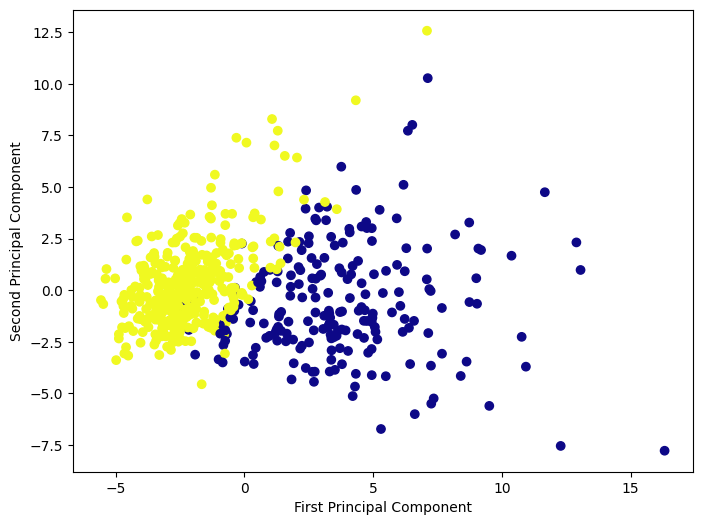

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')